In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, sqlalchemy as sa, warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = sa.create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()
edu_df.head()
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [4]:
edu_df.isnull().sum()*100/edu_df.count()

PRIMARY_KEY                       0.000000
STATE                             0.000000
YEAR                              0.000000
ENROLL                           21.399512
TOTAL_REVENUE                    16.562500
FEDERAL_REVENUE                  16.562500
STATE_REVENUE                    16.562500
LOCAL_REVENUE                    16.562500
TOTAL_EXPENDITURE                16.562500
INSTRUCTION_EXPENDITURE          16.562500
SUPPORT_SERVICES_EXPENDITURE     16.562500
OTHER_EXPENDITURE                21.399512
CAPITAL_OUTLAY_EXPENDITURE       16.562500
GRADES_PK_G                      13.115997
GRADES_KG_G                       9.705882
GRADES_4_G                        9.625276
GRADES_8_G                        9.625276
GRADES_12_G                       9.625276
GRADES_1_8_G                      9.625276
GRADES_9_12_G                     9.625276
GRADES_ALL_G                     13.115997
AVG_MATH_4_SCORE                178.358209
AVG_MATH_8_SCORE                180.451128
AVG_READING

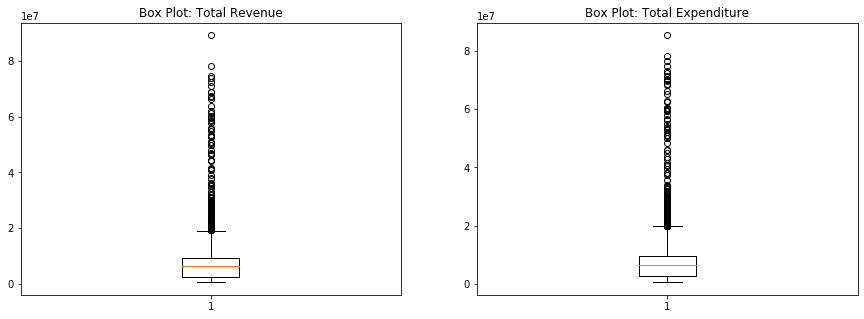

In [5]:
# 1. Do the variables have outliers
edu_df['TOTAL_REVENUE'].fillna(edu_df['TOTAL_REVENUE'].mean(), inplace=True)
edu_df['TOTAL_EXPENDITURE'].fillna(edu_df['TOTAL_REVENUE'].mean(), inplace=True)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(edu_df["TOTAL_REVENUE"])
plt.title("Box Plot: Total Revenue")

plt.subplot(1,2,2)
plt.boxplot(edu_df["TOTAL_EXPENDITURE"])
plt.title("Box Plot: Total Expenditure")
plt.show()

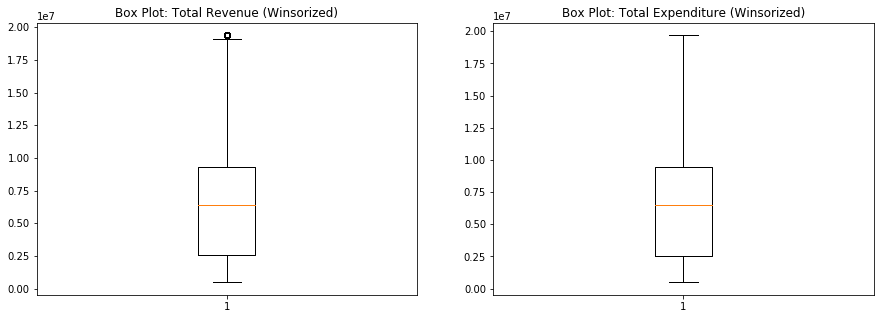

In [6]:
# 2. Eliminating outliers
# Limiting outliers
from scipy.stats.mstats import winsorize

w_r = winsorize(edu_df["TOTAL_REVENUE"], (0,0.10))
w_e = winsorize(edu_df["TOTAL_EXPENDITURE"], (0,0.10))

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(w_r)
plt.title("Box Plot: Total Revenue (Winsorized)")

plt.subplot(1,2,2)
plt.boxplot(w_e)
plt.title("Box Plot: Total Expenditure (Winsorized)")
plt.show()

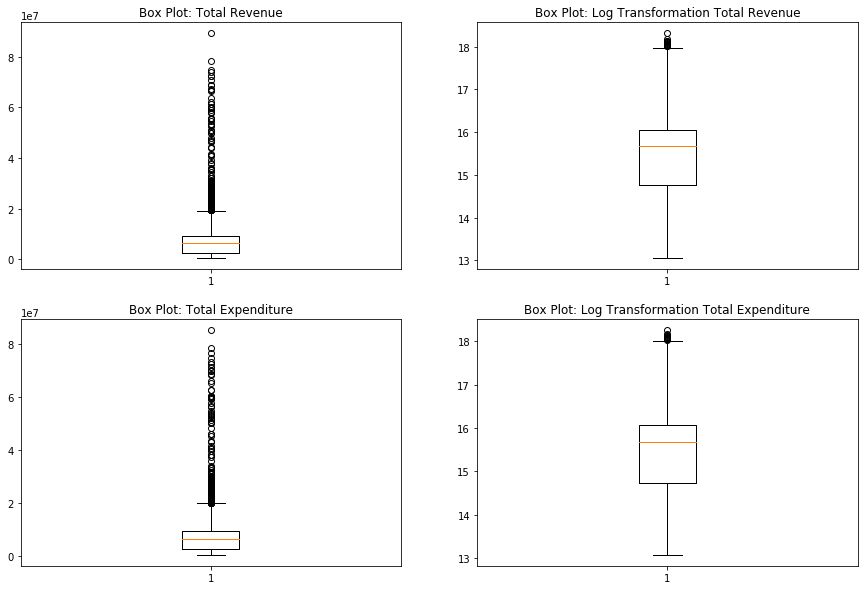

In [7]:
# Transforming outliers
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.boxplot(edu_df['TOTAL_REVENUE'])
plt.title("Box Plot: Total Revenue")

plt.subplot(2,2,2)
plt.boxplot(np.log(edu_df['TOTAL_REVENUE']))
plt.title("Box Plot: Log Transformation Total Revenue")

plt.subplot(2,2,3)
plt.boxplot(edu_df['TOTAL_EXPENDITURE'])
plt.title("Box Plot: Total Expenditure")

plt.subplot(2,2,4)
plt.boxplot(np.log(edu_df['TOTAL_EXPENDITURE']))
plt.title("Box Plot: Log Transformation Total Expenditure")
plt.show()

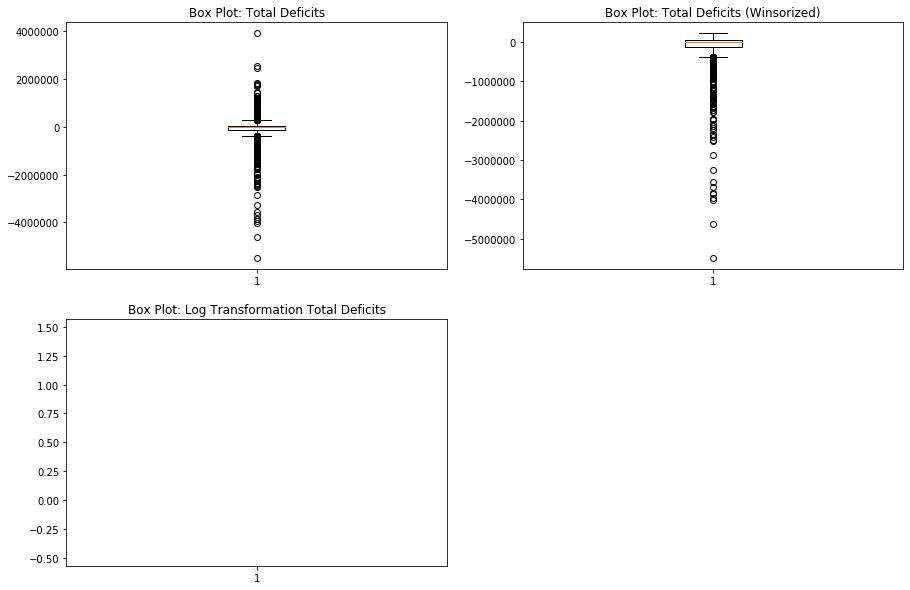

In [8]:
edu_df['DEFICIT'] = edu_df['TOTAL_REVENUE']-edu_df['TOTAL_EXPENDITURE']
w_d = winsorize(edu_df["DEFICIT"], (0,0.10))

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.boxplot(edu_df['DEFICIT'])
plt.title("Box Plot: Total Deficits")

plt.subplot(2,2,2)
plt.boxplot(w_d)
plt.title("Box Plot: Total Deficits (Winsorized)")

plt.subplot(2,2,3)
plt.boxplot(np.log(edu_df['DEFICIT']))
plt.title("Box Plot: Log Transformation Total Deficits")
plt.show()

# Why is the log not appearing? (negative values?)

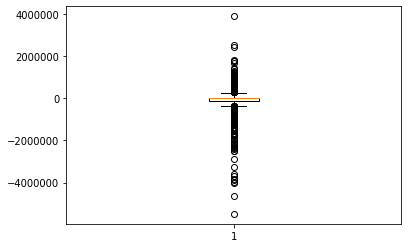

In [9]:
edu_df['W_DEFICIT'] = winsorize(edu_df['TOTAL_REVENUE']) - winsorize(edu_df['TOTAL_EXPENDITURE'])

plt.boxplot(edu_df['W_DEFICIT'])
plt.show()